# I/O handling and settings #

The raredecay package contains simple functions to save all the output produced during the run and even provides the simple possibility to add your own output.

To be able to save the output, and also to tweak a few other settings like the logger verbosity, we have to call *initialize()* right at the beginning before any import statements occur.

If we ommit this step and go right to our desired functions, a standard *initialize()* will be called automatically with no output-path defined.

### Why do we want output saved to file? ###

Not every information should be displayed during a run in the console and not every figure should be plotted. But if the output_path is specified, every information (more then displayed) and nearly every plot (some issues there, but most of the plots work) gets saved to file anyway. So you still have the possibility to lookup things later on which you though may are not of interest.
And not to forget: if you run it as a job, it is often the easiest way to save the output directly instead of redericting the prints to the console.

In [2]:
from raredecay import settings
settings.initialize(output_path='tmp_output',  # any valid directory, best use absolute path.
                    #If None -> no output saved
                    run_name="My first run",  # Names the folder
                    overwrite_existing=False,  # False by default. Adds a number if folder already exists.
                        # If True, overwrite existing folder.
                    run_message="This is my first run, just checking out the settings module",
                        # appears at the beginning of the saved output file
                    verbosity=3,  # Default value. between 1 and 5. The higher, the more the code will tell you
                    plot_verbosity=3,  # Default value. same as verbosity but for showing plots
                    prompt_for_input=True,  # if True, the script asks for an addition to the run-name
                        # as well as before *show()*
                    logger_console_level='warning',  # Default value. What kind of logger messages you want to see
                        #in the console
                    logger_file_level='debug',  # Default value. Values:'debug', 'info', 'warning', 'error', 'critical'
                    # The "higher" (more serious) the level, the less will be logged (from the level specified and up)
                    n_cpu=1,  # Default value. The estimated number of cores/threads to use. Can be changed later
                    gpu_in_use=False  # Default value, advanced. Can be changed later.
                        #Only use if gpu-parallelization is in use                    
)

Enter an (optional) extension to the run-name and press 'enter':
n_estimators 20 with L2 0.1


#### Prompt_for_input ####
As prompt_for_input was set to True, the script asked for a name extension. It is useful to enter your "instant thoughts about the run", like in the example: "n_estimators 20 with L2 0.1" to remember why you did this run. It will be added to the file name, as we will see later on.

## Writing your script ##
So far, everything is done for the initialization and all the functions from the package can be imported. To make sure that the output will be saved, we have to call *finalize()* at the very end.



### Changing settings during the script ###
It is possible, for some settings, to be changed during the script (and therefore between diferent function calls).

In [3]:
settings.set_verbosity(verbosity=3,  # Default value
                       plot_verbosity=3  # Default value
                      )
settings.parallel_profile(n_cpu=-1,  # Default value. Will choose all available cpus.
                              # -2 takes all but one, -3 all but 2 and so on...
                          gpu_in_use=False  # Default value.
                         )
settings.figure_save_config(file_formats=['png', 'svg'],  #Default value.
                            # The formats to save the figure to. See the docs for available formats
                            to_pickle=True,  # Default value. Pickles the matplotlib-figure for possible re-plot
                            dpi=150  # Default value. The image resolution
                            )

### Adding additional output ###
During a script, we may want to add output by ourselves; comments, figures, dictionaries, data...
The easiest way to do that is to get the output-handler of the package.

In [4]:
out = settings.get_output_handler()

To add any kind of output, we just have to call *add_output()* and give all the output inside of an iterable.

In [5]:
out.add_output(["Hi, I am ", 42, "without", {'me': 42, 'he': 41}])

Hi, I am  42 without 
  me : 42
  he : 41



It concatenates the objects and creates a nice representation (e.g. for dicts).
We can specify several options:

In [6]:
out.add_output(["Hi, I am ", 42, "without", {'me': 42, 'he': 41}],
               to_end=False,  # Default value. If True, the output will be written at the very end.
               # This should be done with the important results in order to see them all at the end.
               importance=3, # Default value. The higher, the more likely it will be **printed** (it is saved anyway).
                   # Whether something is printed/plotted depends on the importances as well as on the verbosity
                   # There is a trade-off between verbosity and importance
               title="We can set a big title here",
               subtitle="Or (also) a subtitle",
               section="This is the smallest title",  # We do not need to have all three kinds of title at once;)
               obj_separator=" ",  # Default value. The separation between the printed objects.
               data_separator="\n\n",  # Default value. The strings to separate from the next *add_output()*
               force_newline=False  # Default value. If True, this output will be written on a newline, no matter
                   # how the last output ended and not be concatenated  on the same line as the last *add_output()*
              )


We can set a big title here

--------------------
Or (also) a subtitle
--------------------


This is the smallest title
Hi, I am  42 without 
  me : 42
  he : 41



Beside objects off all kind, we can also save figures. This does the same as plt.figure() but saves it in addition (at the end of the run, so you can plot into the same figure several times)

In [7]:
my_figure = out.save_fig("My first figure")

# as an example:
import matplotlib.pyplot as plt
plt.hist([1,4, 5, 4, 2, 4, 2])

(array([ 1.,  0.,  2.,  0.,  0.,  0.,  0.,  3.,  0.,  1.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

Again, we can specify a couple of parameters:

In [8]:
my_figure2 = out.save_fig("My second figure",
                          importance=3,  # same as for *add_output()*
                          file_format=None,  # Default value. If None, will take the default ones.
                          to_pickle=True,  # Default value. If True, pickle the figure for a possible re-plot
                         )
# as an example, we may also plot something
plt.hist([1,1,1,1,2,2,3,4,5,5,5])

(array([ 4.,  0.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,  3.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

### Advanced feature: rederict I/O-stream ###
You may encounter a package, that prints its output directly to the console, but you want to save it to a file too.
Therefore you can use the *IO_to_string()* method, which redericts the output, and *IO_to_sys()* to have normal output again.

In [11]:
out.IO_to_string()
print "You cannot see that... yet"

The output is currently collected by the output-handler.

In [13]:
out.IO_to_sys(importance=3,  # Default value. Whether to plot the collected output or not
              # We can add several keyword-arguments, which will be given directly to *add_output()*
              # Example:
               section="Example of IO_to_sys and back")



Example of IO_to_sys and back
You cannot see that... yet




'You cannot see that... yet\n'

## Finalize the run  ##
At the end of every run, we should (and have to in case we specified an output_path) finalize it.
As we choose *prompt_for_input* in the *initialize()* function, we will be asked to press enter (an empty input) before the plots will be showed. This way we won't be suprised by popping up windows.


END OF RUN My first run n_estimators 20 with L2 0.1





Time information
Run startet at Sun Oct  9 14:40:23 2016 
and lasted for 00:08:53

Errors encountered during run : 0

Warnings encountered during run : 0

All output saved under: tmp_output/My_first_run_n_estimators_20_with_L2_0_1_1/
['Run finished, press Enter to show the plots']


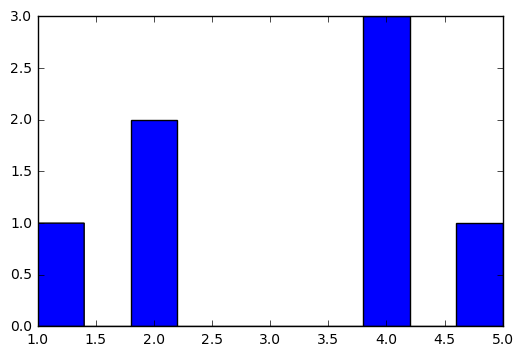

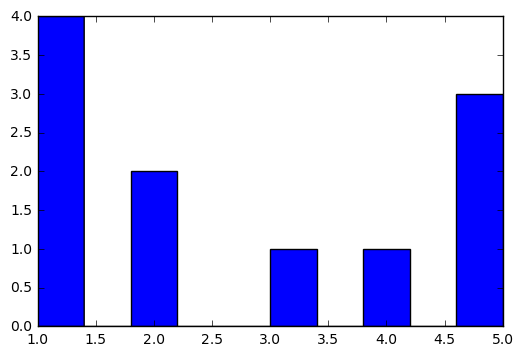

'\n=============================================\nRun: My first run n_estimators 20 with L2 0.1\n=============================================\n\n----------------------\nComments about the run\n----------------------\n\n\nHi, I am  42 without \n  me : 42\n  he : 41\n\n\n===========================\nWe can set a big title here\n===========================\n\n--------------------\nOr (also) a subtitle\n--------------------\n\n\nThis is the smallest title\n==========================\nHi, I am  42 without \n  me : 42\n  he : 41\n\n\n\nExample of IO_to_sys and back\n=============================\nYou cannot see that... yet\n\n\n\n\nExample of IO_to_sys and back\n=============================\nYou cannot see that... yet\n\n\n\n\nExample of IO_to_sys and back\n=============================\nYou cannot see that... yet\n\n\n\n===================================================\nEND OF RUN My first run n_estimators 20 with L2 0.1\n===================================================\n\n\n\n\n====

In [15]:
settings.finalize(show_plots=True,  # Default value. The *lazy* way for plt.show() ;)
                  play_sound_at_end=False  # Default value. If True, a beep will sound at the end
                      #to let you know it's at the end.
                  )

The function *finalize()* returns all the output nicely formatted (as seen on the screen above the plots) and can be used for whatever.